In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score

from tqdm import tqdm
from math import log10

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics import top_k_accuracy_score
from sklearn.feature_selection import f_classif, f_regression

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Get top 10 features for sat prediction 

In [8]:
runtimes = pd.read_excel('C:/Users/Jasmin/Documents/MSc-Thesis/Data/Runtime/conf_all_mipverify.xlsm')
df0 = pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_dynamic_dataclean_mnistnet.csv')
df0.rename(columns={'SampleNumber': 'INSTANCE_NAME'}, inplace=True)
df0.drop(columns='Unnamed: 0', inplace=True)
df = pd.merge(pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/mnistnet_SCIP_staticON_data.csv'),
              pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/mnistnet_SCIP_staticOFF_data.csv'), on="INSTANCE_NAME")

df['INSTANCE_NAME'] = df['INSTANCE_NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df0['INSTANCE_NAME'] = df0['INSTANCE_NAME'].astype('int')

df = pd.merge(df,df0, on="INSTANCE_NAME")

lp_list = list(df['INSTANCE_NAME'])
runtimes = runtimes.loc[runtimes['SampleNumber'].isin(lp_list)]
df = df.rename(columns={"INSTANCE_NAME": "SampleNumber"})


C:\Users\Jasmin\AppData\Local\Temp\ipykernel_3440\1914243759.py:2: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_dynamic_dataclean_mnistnet.csv')


In [9]:
'''
for col in df.columns:
    print(col)
    df[str(col)] = df[str(col)].replace('%', '')
    df[str(col)] = df[str(col)].astype(float)

'''
df['GapFirstSol.'] = df['GapFirstSol.'].str.replace('%', '')
df['GapLastSol.'] = df['GapLastSol.'].str.replace('%', '')

In [10]:
for col in df.columns:
    print(col)
    df[str(col)] = df[str(col)].replace('%', '')
    df[str(col)] = df[str(col)].astype(float)

SampleNumber
VARS_presolve_default
BIN_VARS_presolve_default
INT_VARS_presolve_default
CONT_VARS_presolve_default
IMPLINT_VARS_presolve_default
FIXED_VARS_presolve_default
TOTAL_OBJNONZERO_VARS_presolve_default
BIN_OBJNONZERO_VARS_presolve_default
INT_OBJNONZERO_VARS_presolve_default
CONT_OBJNONZERO_VARS_presolve_default
IMPLINT_OBJNONZERO_VARS_presolve_default
FIXED_OBJNONZERO_VARS_presolve_default
PER_FINITE_UB_presolve_default
PER_FINITE_LB_presolve_default
UPPERBOUNDS_MEAN_presolve_default
UPPERBOUNDS_MIN_presolve_default
UPPERBOUNDS_MAX_presolve_default
UPPERBOUNDS_STD_presolve_default
UPPERBOUNDS_MEDIAN_presolve_default
UPPERBOUNDS_DENSITY_presolve_default
LOWERBOUNDS_MEAN_presolve_default
LOWERBOUNDS_MIN_presolve_default
LOWERBOUNDS_MAX_presolve_default
LOWERBOUNDS_STD_presolve_default
LOWERBOUNDS_MEDIAN_presolve_default
LOWERBOUNDS_DENSITY_presolve_default
BOUNDRANGE_MEAN_presolve_default
BOUNDRANGE_MIN_presolve_default
BOUNDRANGE_MAX_presolve_default
BOUNDRANGE_STD_presolve_de

ValueError: could not convert string to float: '          0+         1          0         54          0          0          0          0          0          0          0          0          0          0          0\n'

In [11]:
df.drop(columns=['Constraints_knapsack', 'ConstraintTimings_knapsack'], inplace=True)

In [12]:
for col in df.columns:
    print(col)
    df[str(col)] = df[str(col)].replace('%', '')
    df[str(col)] = df[str(col)].astype(float)

SampleNumber
VARS_presolve_default
BIN_VARS_presolve_default
INT_VARS_presolve_default
CONT_VARS_presolve_default
IMPLINT_VARS_presolve_default
FIXED_VARS_presolve_default
TOTAL_OBJNONZERO_VARS_presolve_default
BIN_OBJNONZERO_VARS_presolve_default
INT_OBJNONZERO_VARS_presolve_default
CONT_OBJNONZERO_VARS_presolve_default
IMPLINT_OBJNONZERO_VARS_presolve_default
FIXED_OBJNONZERO_VARS_presolve_default
PER_FINITE_UB_presolve_default
PER_FINITE_LB_presolve_default
UPPERBOUNDS_MEAN_presolve_default
UPPERBOUNDS_MIN_presolve_default
UPPERBOUNDS_MAX_presolve_default
UPPERBOUNDS_STD_presolve_default
UPPERBOUNDS_MEDIAN_presolve_default
UPPERBOUNDS_DENSITY_presolve_default
LOWERBOUNDS_MEAN_presolve_default
LOWERBOUNDS_MIN_presolve_default
LOWERBOUNDS_MAX_presolve_default
LOWERBOUNDS_STD_presolve_default
LOWERBOUNDS_MEDIAN_presolve_default
LOWERBOUNDS_DENSITY_presolve_default
BOUNDRANGE_MEAN_presolve_default
BOUNDRANGE_MIN_presolve_default
BOUNDRANGE_MAX_presolve_default
BOUNDRANGE_STD_presolve_de

ValueError: could not convert string to float: '-'

In [13]:
df['LP_dualLP_Iter/sec'] = df['LP_dualLP_Iter/sec'].replace('-', 0)

In [14]:
df['LP_diving/probingLP_Iter/sec'] = df['LP_diving/probingLP_Iter/sec'].replace('-', 0)

In [15]:
df['LP_diving/probingLP_Iter/sec'] = df['LP_diving/probingLP_Iter/sec'].replace('\n', 0)

In [16]:
df.drop(columns=['LP_diving/probingLP_Iter/sec'], inplace=True)

In [17]:
for i in df.columns:
    print(i)

SampleNumber
VARS_presolve_default
BIN_VARS_presolve_default
INT_VARS_presolve_default
CONT_VARS_presolve_default
IMPLINT_VARS_presolve_default
FIXED_VARS_presolve_default
TOTAL_OBJNONZERO_VARS_presolve_default
BIN_OBJNONZERO_VARS_presolve_default
INT_OBJNONZERO_VARS_presolve_default
CONT_OBJNONZERO_VARS_presolve_default
IMPLINT_OBJNONZERO_VARS_presolve_default
FIXED_OBJNONZERO_VARS_presolve_default
PER_FINITE_UB_presolve_default
PER_FINITE_LB_presolve_default
UPPERBOUNDS_MEAN_presolve_default
UPPERBOUNDS_MIN_presolve_default
UPPERBOUNDS_MAX_presolve_default
UPPERBOUNDS_STD_presolve_default
UPPERBOUNDS_MEDIAN_presolve_default
UPPERBOUNDS_DENSITY_presolve_default
LOWERBOUNDS_MEAN_presolve_default
LOWERBOUNDS_MIN_presolve_default
LOWERBOUNDS_MAX_presolve_default
LOWERBOUNDS_STD_presolve_default
LOWERBOUNDS_MEDIAN_presolve_default
LOWERBOUNDS_DENSITY_presolve_default
BOUNDRANGE_MEAN_presolve_default
BOUNDRANGE_MIN_presolve_default
BOUNDRANGE_MAX_presolve_default
BOUNDRANGE_STD_presolve_de

In [18]:
for i in df.iloc[:,-26:].columns:
    print(i,',')

LP_dualLP_Time-0-It ,
LP_dualLP_Calls-0-It ,
LP_resolveinstable_Time ,
LP_resolveinstable_Calls ,
LP_resolveinstable_Iterations ,
LP_resolveinstable_Iter/call ,
LP_resolveinstable_Iter/sec ,
LP_diving/probingLP_Time ,
LP_diving/probingLP_Calls ,
LP_diving/probingLP_Iterations ,
LP_diving/probingLP_Iter/call ,
LP_strongbranching_2_Time ,
LP_strongbranching_2_Calls ,
LP_strongbranching_2_Iterations ,
LP_strongbranching_2_Iter/call ,
LP_strongbranching_2_Iter/sec ,
LP_strongbranching_2_ItLimit ,
LP_conflictanalysis_Time ,
LP_conflictanalysis_Calls ,
LP_conflictanalysis_Iter/call ,
LP_conflictanalysis_Iter/sec ,
FirstLPIters_persecond ,
Integrals_primal-dual_Total ,
Integrals_primal-dual_Avg% ,
Integrals_logicor_1_Avg% ,
Integrals_bounddisjunction_1_Avg% ,


In [19]:
df.drop(columns=['LP_dualLP_Time-0-It', 'LP_dualLP_Calls-0-It', 
                 'LP_resolveinstable_Time' ,'LP_resolveinstable_Calls' , 'LP_resolveinstable_Iterations' , 'LP_diving/probingLP_Calls',
                 'LP_diving/probingLP_Iterations', 'LP_diving/probingLP_Iter/call', 'LP_strongbranching_2_Time' , 'LP_strongbranching_2_Calls',
                 'LP_strongbranching_2_Iterations', 'LP_strongbranching_2_Iter/call', 'LP_strongbranching_2_Iter/sec', 'LP_strongbranching_2_ItLimit',
                 'LP_conflictanalysis_Time', 'LP_conflictanalysis_Calls', 'LP_conflictanalysis_Iter/call', 'LP_conflictanalysis_Iter/sec', 'FirstLPIters_persecond'], inplace=True)

In [20]:
## Join the two datasets by samplenumber/lp_file
df = pd.merge(df, runtimes, on="SampleNumber")
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)
df = df.T.drop_duplicates().T
df

,SampleNumber,VARS_presolve_default,BIN_VARS_presolve_default,CONT_VARS_presolve_default,PER_FINITE_UB_presolve_default,PER_FINITE_LB_presolve_default,UPPERBOUNDS_MEAN_presolve_default,UPPERBOUNDS_MIN_presolve_default,UPPERBOUNDS_MAX_presolve_default,UPPERBOUNDS_STD_presolve_default,...,ObjectiveBound_default-2,SolveStatus_conf1,ObjectiveValue_conf1,ObjectiveBound_conf1,SolveStatus_conf1-2,ObjectiveValue_conf1-2,ObjectiveBound_conf1-2,min,is_infeasible,is_optimal
0,1.0,1043.0,133.0,910.0,1.0,1.0,4.735935,0.000406,795.078676,1059.514905,...,0.042871,Optimal,0.042871,0.04287,Optimal,0.042871,0.04287,900.588016,0,1
1,10.0,907.0,65.0,842.0,1.0,1.0,0.147231,0.0,4.087397,0.11463,...,1000000000000000015902891109759918046836080856...,Infeasible,NaN,1000000000000000015902891109759918046836080856...,Infeasible,NaN,1000000000000000015902891109759918046836080856...,17.654137,1,0
2,100.0,949.0,86.0,863.0,1.0,1.0,0.186543,0.0,6.169083,0.234472,...,0.049376,Optimal,0.049378,0.049373,Optimal,0.049378,0.049373,14.764228,0,1
3,1000.0,1131.0,177.0,954.0,1.0,1.0,0.290094,0.0,4.755688,0.276921,...,0.032203,Optimal,0.032205,0.032202,Optimal,0.032205,0.032202,728.792111,0,1
4,10000.0,837.0,30.0,807.0,1.0,1.0,0.106777,0.003922,3.768477,0.094294,...,1000000000000000015902891109759918046836080856...,Infeasible,NaN,1000000000000000015902891109759918046836080856...,Infeasible,NaN,1000000000000000015902891109759918046836080856...,0.246379,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995.0,1053.0,138.0,915.0,1.0,1.0,0.282128,0.0,5.027991,0.293505,...,0.028346,Optimal,0.028346,0.028346,Optimal,0.028346,0.028346,169.452856,0,1
9996,9996.0,875.0,49.0,826.0,1.0,1.0,0.14327,0.0,5.184544,0.17128,...,1000000000000000015902891109759918046836080856...,Infeasible,NaN,1000000000000000015902891109759918046836080856...,Infeasible,NaN,1000000000000000015902891109759918046836080856...,1.18708,1,0
9997,9997.0,951.0,87.0,864.0,1.0,1.0,5.47619,0.000964,406.903562,547.719346,...,0.044925,Optimal,0.044925,0.044925,Optimal,0.044925,0.044925,809.385036,0,1
9998,9998.0,1071.0,147.0,924.0,1.0,1.0,0.791299,0.000293,79.192641,9.413911,...,0.037939,Optimal,0.037941,0.037938,Optimal,0.037941,0.037941,693.443052,0,1


Optimal                  3429
InfeasibleOrUnbounded    1492
UserLimit                  79
Name: SolveStatus_default, dtype: int64
Optimal                  3430
InfeasibleOrUnbounded    1492
UserLimit                  78
Name: SolveStatus_default, dtype: int64
training accuracy: 1.0
test accuracy: 0.9454
[[1335    0  157]
 [   0   17   61]
 [  47    8 3375]]


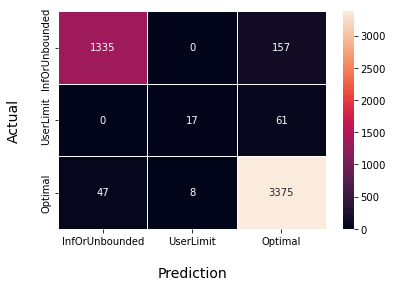

,RootLPEstimate,Gap,LP_diving/probingLP_Time,PrimalHeuristics_zirounding_Calls,FinalDualBound,Constraints_integral_Children,PrimalHeuristics_alns_Calls,Integrals_primal-dual_Total,PrimalHeuristics_intshifting_ExecTime,PrimalHeuristics_feaspump_ExecTime
0,0.048546,0.048219,0.039946,0.035571,0.033866,0.028547,0.027761,0.023524,0.023067,0.022024


In [21]:
#### SOLVER STATUS DEFAULT
X = df.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)

y = df['SolveStatus_default']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
#print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'UserLimit', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10).T

Optimal                  6859
InfeasibleOrUnbounded    2984
Name: SolveStatus_default, dtype: int64
Optimal                  3429
InfeasibleOrUnbounded    1492
Name: SolveStatus_default, dtype: int64
Optimal                  3430
InfeasibleOrUnbounded    1492
Name: SolveStatus_default, dtype: int64
training accuracy: 1.0
test accuracy: 0.9581470946769606
f1 score: 0.9704617149412103
[[1332  160]
 [  46 3384]]


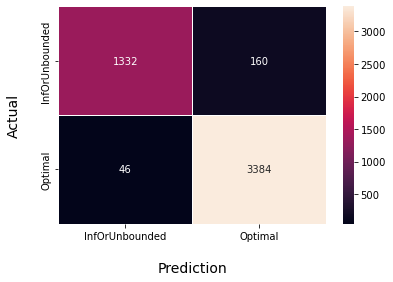

,RootLPEstimate,FinalDualBound,PrimalHeuristics_intshifting_Calls,Propagators_redcost_#Propagate,PrimalHeuristics_zirounding_Calls,Integrals_primal-dual_Avg%,PrimalHeuristics_feaspump_ExecTime,Separators_aggregation_ExecTime,Integrals_primal-dual_Total,Constraints_varbound_1_#Check
0,0.046858,0.041295,0.039697,0.036132,0.032755,0.032611,0.02908,0.029076,0.025091,0.023706


In [22]:
## Without UserLimit
#### SOLVER STATUS DEFAULT
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score


df_no_ul = df[df.SolveStatus_default != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_default'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)
y = df_no_ul['SolveStatus_default']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds, pos_label='Optimal'))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Binary Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10).T

Optimal       3284
Infeasible    1493
UserLimit      223
Name: SolveStatus_conf1, dtype: int64
Optimal       3284
Infeasible    1492
UserLimit      224
Name: SolveStatus_conf1, dtype: int64
training accuracy: 1.0
test accuracy: 0.9232
[[   0    0    0]
 [   0   45  179]
 [   0   27 3213]]


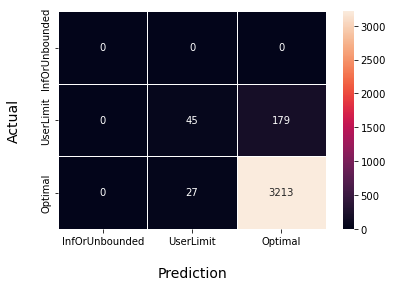

,Propagators_redcost_#Propagate,PrimalHeuristics_intshifting_ExecTime,Integrals_primal-dual_Total,RootLPEstimate,Integrals_primal-dual_Avg%,PrimalHeuristics_zirounding_Calls,BranchingRules_relpscost_ExecTime,PrimalHeuristics_alns_Calls,FinalDualBound,FirstLPvalue
0,0.045911,0.041711,0.038395,0.028336,0.02675,0.024387,0.024099,0.023847,0.022399,0.020573


In [23]:
#### SOLVER STATUS c1
X = df.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)

y = df['SolveStatus_conf1']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
#print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'UserLimit', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10).T

Optimal       6568
Infeasible    2985
Name: SolveStatus_conf1, dtype: int64
Optimal       3284
Infeasible    1492
Name: SolveStatus_conf1, dtype: int64
Optimal       3284
Infeasible    1493
Name: SolveStatus_conf1, dtype: int64
training accuracy: 1.0
test accuracy: 0.9621101109482939
f1 score: 0.9728432108027008
[[1354  139]
 [  42 3242]]


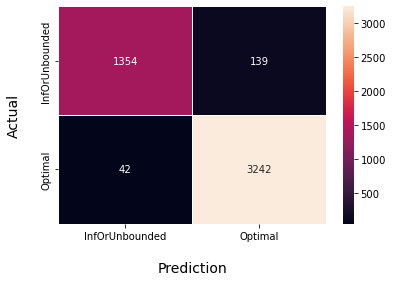

,RootLPEstimate,PrimalHeuristics_intshifting_Calls,Propagators_redcost_#Propagate,FinalDualBound,Integrals_primal-dual_Total,Propagators_pseudoobj_1_#Propagate,Cutselectors_hybrid_Calls,Separators_cutpool_Calls,Gap,Constraints_benderslp_#EnfoLP
0,0.048982,0.035269,0.034427,0.033059,0.032005,0.028646,0.027478,0.027298,0.027003,0.026561


In [27]:
df_no_ul = df[df.SolveStatus_conf1 != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_conf1'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)
y = df_no_ul['SolveStatus_conf1']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds, pos_label='Optimal'))


c_array = confusion_matrix(testing_labels, preds, labels=['Infeasible', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Binary Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10).T

## Principle Component analysis

In [ ]:
X = df.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)

y =  df['SolveStatus_default']

x_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(x_scaled)


pcaDF = pd.DataFrame(data = pcs, columns = ['principal component 1', 'principal component 2'])
print(pcaDF)

print(pca.components_)

# ratio of the total variance each principal component captures.
print(sum(pca.explained_variance_ratio_))

dfpca = pd.concat([pcaDF, y], axis = 1)
dfpca

      principal component 1  principal component 2
0                 -3.267450              -5.211450
1                 -6.768877             -10.881307
2                 -7.541871              -9.604815
3                 -3.387308               6.707169
4                  8.762989              -2.877776
...                     ...                    ...
9995              -4.975235               3.494894
9996               5.194529              -1.378857
9997              -1.429489              -6.526761
9998              -4.443919              -3.082742
9999              -1.297664              -5.117797

[10000 rows x 2 columns]
[[ 5.90084004e-02 -6.52523754e-02  8.27796431e-02 -9.71928170e-02
  -9.68914288e-02 -1.54350020e-02 -1.10968942e-02 -7.92292826e-03
  -1.82057704e-03 -1.77631251e-02 -9.41929521e-03  1.28473493e-02
   6.65817096e-03  1.71659264e-02 -8.27391520e-04  1.20868648e-02
  -1.95085406e-02 -1.46770892e-02  4.21935921e-02 -7.56659905e-03
  -9.94381405e-04 -1.83835590e-0

,principal component 1,principal component 2,SolveStatus_default
0,-3.267450,-5.211450,Optimal
1,-6.768877,-10.881307,InfeasibleOrUnbounded
2,-7.541871,-9.604815,Optimal
3,-3.387308,6.707169,Optimal
4,8.762989,-2.877776,InfeasibleOrUnbounded
...,...,...,...
9995,-4.975235,3.494894,Optimal
9996,5.194529,-1.378857,InfeasibleOrUnbounded
9997,-1.429489,-6.526761,Optimal
9998,-4.443919,-3.082742,Optimal


In [ ]:
modified_dfpca = dfpca.drop(dfpca[dfpca['principal component 2'] > 150].index)

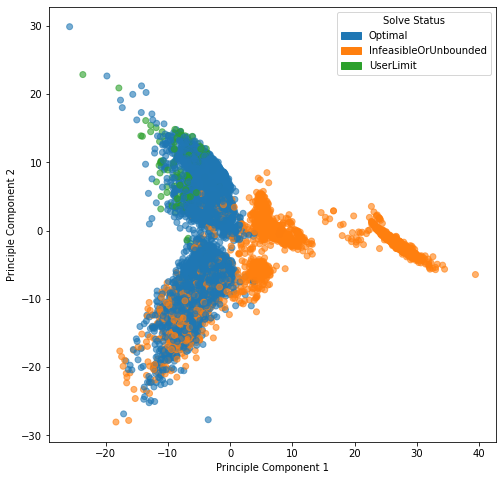

In [ ]:
import matplotlib.patches

#####################
#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 

fig = plt.figure(figsize = (8,8))
levels, categories = pd.factorize(modified_dfpca['SolveStatus_default'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]


plt.scatter(modified_dfpca['principal component 1'], 
           modified_dfpca['principal component 2'],c=colors, alpha=0.6)
plt.gca().set(xlabel='Principle Component 1', ylabel='Principle Component 2')
plt.legend(handles=handles, title='Solve Status')

In [ ]:
X = df.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)

y = df['SolveStatus_default']
x_scaled = StandardScaler().fit_transform(X)

EVR = []
nlist = []
for n in range(101):
    pca = PCA(n_components=n)
    pca.fit_transform(x_scaled)
    # ratio of the total variance each principal component captures.
    print(sum(pca.explained_variance_ratio_))
    EVR.append(sum(pca.explained_variance_ratio_))
    nlist.append(n)

0
0.17387056456325864
0.2884664503009839
0.3943760444779921
0.4670359403626245
0.5122268146135037
0.5327565842921709
0.551526295336691
0.5681420745352546
0.5832309995668054
0.5972111583314997
0.6100902829047735
0.6220234508767224
0.6327353965952819
0.6431139293541901
0.6526400374963613
0.66204036641423
0.6706938776563396
0.6787361445109354
0.6863883111103327
0.6936830380556904
0.7005524450331383
0.7072633590948646
0.7137545443899654
0.719906282163162
0.725696995065914
0.7313137383832571
0.7367285372372919
0.7420839242367047
0.7473041983547672
0.752421933235702
0.7575220163513783
0.7623817494116168
0.7670295268117986
0.771525890571949
0.7759134397023957
0.7801505743384911
0.7841066261941229
0.788238519850027
0.7921200650567146
0.7958325944755134
0.7994427443695877
0.8030017674595126
0.8065200404062715
0.8089333793483788
0.8124823010123182
0.8157247148469867
0.8189092784099866
0.8221818324068231
0.8252307004357001
0.8284050375631348
0.8315461605960813
0.8345959733342607
0.837573041581049

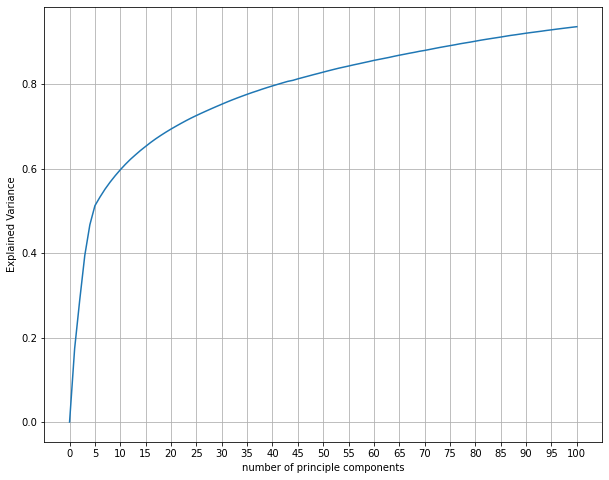

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(nlist, EVR)
plt.xticks(np.arange(0, 101, step=5))
plt.xlabel('number of principle components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

Optimal       6568
Infeasible    2985
Name: SolveStatus_conf1, dtype: int64
      principal component 1  principal component 2
0                 -3.544897               7.167256
1                 -6.985579               8.003675
2                 -7.818558               6.510824
3                 -3.638266              -7.180004
4                  8.518953               1.676584
...                     ...                    ...
9548              -5.198742              -3.406895
9549               4.969361              -0.114050
9550              -1.701349               7.500731
9551              -4.746919               4.432603
9552              -1.543807               6.261772

[9553 rows x 2 columns]
[[ 6.38222830e-02 -6.44174549e-02  8.44325109e-02 -9.65831397e-02
  -9.62899747e-02 -1.66187975e-02 -1.25696474e-02 -8.65710159e-03
  -2.16048680e-03 -1.90861902e-02 -9.06002153e-03  1.40355691e-02
   7.22899059e-03  1.68898337e-02 -9.40201420e-04  1.31499900e-02
  -2.18954701e-02 -1.59

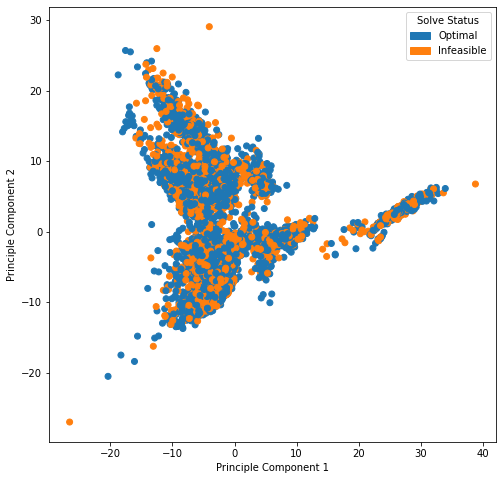

In [ ]:
# Remove timeouts
df_no_ul = df[df.SolveStatus_conf1 != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_conf1'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveStatus_default',	'ObjectiveValue_default', 'ObjectiveBound_default',
             	'SolveStatus_default-2', 'ObjectiveValue_default-2', 'ObjectiveBound_default-2', 'SolveStatus_conf1',
                    	'ObjectiveValue_conf1', 'ObjectiveBound_conf1', 'SolveStatus_conf1-2', 'ObjectiveValue_conf1-2', 'ObjectiveBound_conf1-2',
                        'min', 'is_infeasible', 'is_optimal'], axis = 1)

y = df_no_ul['SolveStatus_conf1']

x_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(x_scaled)


pcaDF = pd.DataFrame(data = pcs, columns = ['principal component 1', 'principal component 2'])
print(pcaDF)

print(pca.components_)

# ratio of the total variance each principal component captures.
print(sum(pca.explained_variance_ratio_))

dfpca = pd.concat([pcaDF, y], axis = 1)
dfpca


modified_dfpca = dfpca.drop(dfpca[dfpca['principal component 2'] > 150].index)


fig = plt.figure(figsize = (8,8))
levels, categories = pd.factorize(modified_dfpca['SolveStatus_conf1'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]


plt.scatter(modified_dfpca['principal component 1'], 
           modified_dfpca['principal component 2'],c=colors)
plt.gca().set(xlabel='Principle Component 1', ylabel='Principle Component 2')
plt.legend(handles=handles, title='Solve Status')

